<a href="https://colab.research.google.com/github/Gauravkumarlokhande/Gauravkumarlokhande/blob/main/SVM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Red Wine Quality.csv')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
def unique(value):
  if value<=4:
    return 0
  elif value>4:
    return 1

In [ ]:
data['quality']=data['quality'].apply(unique)

# ***Support Vector Machine Classifier ***

Please enter the name of your dependent variable (same as given in the data): quality
please select the size for testing (should be a decimal between 0 and 1): 0.3
please specify the random state: 101
----------------------------------------------------------------------------------------------
shape of x_train= (1119, 11)
shape of x_test= (480, 11)
shape of y_train= (1119,)
shape of y_test= (480,)
----------------------------------------------------------------------------------------------
Do you want to scale the data (yes or no): no
You have choosen not to scale the data
-----------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Accuracy score for training data:  0.9651474530831099
Accuracy score for testing data:  0.95
--------------------------------------------------------------------------------------------------
Classification report for trainin

Text(0, 0.5, 'True Positive Rate---->')

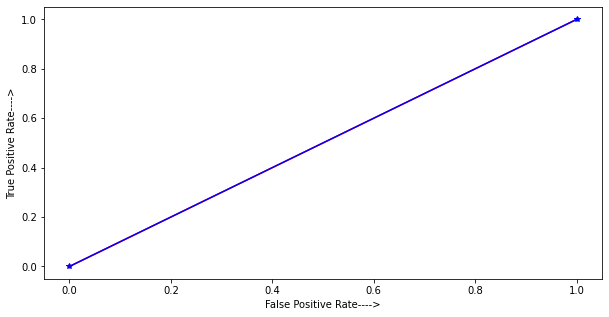

In [ ]:
dept=str(input('Please enter the name of your dependent variable (same as given in the data): '))
y=data[dept]
x=data.drop(columns=[dept])

test=float(input('please select the size for testing (should be a decimal between 0 and 1): '))
state=int(input('please specify the random state: '))

from sklearn.model_selection import train_test_split as tst
x_train,x_test,y_train,y_test=tst(x,y,random_state=state,test_size=test)
print('----------------------------------------------------------------------------------------------')
print('shape of x_train= {}'.format(x_train.shape))
print('shape of x_test= {}'.format(x_test.shape))
print('shape of y_train= {}'.format(y_train.shape))
print('shape of y_test= {}'.format(y_test.shape))
print('----------------------------------------------------------------------------------------------')

choice=str(input('Do you want to scale the data (yes or no): '))
if choice=='yes':
    from sklearn.preprocessing import StandardScaler as STD
    st=STD()
    x_train=st.fit_transform(x_train)
    x_test=st.fit_transform(x_test)
else:
    print('You have choosen not to scale the data')
print('-----------------------------------------------------------------------------------------------')
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
print('------------------------------------------------------------------------------------------------')
print('Accuracy score for training data: ', sv.score(x_train,y_train))
print('Accuracy score for testing data: ',sv.score(x_test,y_test))

y_pred_train=sv.predict(x_train)
y_pred_test=sv.predict(x_test)

from sklearn.metrics import classification_report, auc, roc_curve, confusion_matrix
print('--------------------------------------------------------------------------------------------------')
print('Classification report for training data')
print(classification_report(y_train,y_pred_train))
print('--------------------------------------------------------------------------------------------------')

print('Classification report for testing data')
print(classification_report(y_test,y_pred_test))
print('--------------------------------------------------------------------------------------------------')

print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_test))
print('--------------------------------------------------------------------------------------------------')

import matplotlib.pyplot as plt

sv_fpr,sv_tpr,threshold=roc_curve(y_test,y_pred_test)
sv_fpr_train,sv_tpr_train,threshold=roc_curve(y_train,y_pred_train)

auc_sv=auc(sv_fpr,sv_tpr)
auc_sv_train=auc(sv_fpr_train,sv_tpr_train)

plt.figure(figsize=(10,5))
plt.plot(sv_fpr,sv_tpr,marker='.',color='red')
plt.plot(sv_fpr_train,sv_tpr_train,marker='*',color='blue')

plt.xlabel('False Positive Rate---->')
plt.ylabel('True Positive Rate---->')
